# Customer Churn Project (Logistic Regression)

Import the necessary libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# Find columns containing empty strings
empty_string_mask = data.applymap(lambda x: isinstance(x, str) and x.strip() == '')

# Print the columns that contain empty strings
columns_with_empty_strings = empty_string_mask.any()

print("Columns with empty strings:", columns_with_empty_strings[columns_with_empty_strings].index.tolist())

Columns with empty strings: ['TotalCharges']


### Preprocess the data and scale the categorical variables as necessary

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


# Replace empty strings with NaN
data.replace(r'^\s*$', np.nan, regex=True, inplace=True)
data.head()
# Drop rows that contain NaN values (which includes empty strings now)
data.dropna(inplace=True)

data['gender'] = LabelEncoder().fit_transform(data['gender'])
data['Partner'] = LabelEncoder().fit_transform(data['Partner'])
data['Dependents'] = LabelEncoder().fit_transform(data['Dependents'])
data['PhoneService'] = LabelEncoder().fit_transform(data['PhoneService'])
data['MultipleLines'] = LabelEncoder().fit_transform(data['MultipleLines'])
data['InternetService'] = LabelEncoder().fit_transform(data['InternetService'])
data['OnlineSecurity'] = LabelEncoder().fit_transform(data['OnlineSecurity'])
data['OnlineBackup'] = LabelEncoder().fit_transform(data['OnlineBackup'])
data['DeviceProtection'] = LabelEncoder().fit_transform(data['DeviceProtection'])
data['TechSupport'] = LabelEncoder().fit_transform(data['TechSupport'])
data['StreamingTV'] = LabelEncoder().fit_transform(data['StreamingTV'])
data['StreamingMovies'] = LabelEncoder().fit_transform(data['StreamingMovies'])
data['Contract'] = LabelEncoder().fit_transform(data['Contract'])
data['PaperlessBilling'] = LabelEncoder().fit_transform(data['PaperlessBilling'])
data['PaymentMethod'] = LabelEncoder().fit_transform(data['PaymentMethod'])
data['Churn'] = LabelEncoder().fit_transform(data['Churn'])

### Segment the data set into train and test. Set up the targets

In [5]:
# Define the features and the target
X = data.drop(columns=['Churn', 'customerID'])
y = data['Churn']

# Split into training and test sets (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Set up the Logistic Regression model instance

In [7]:
from sklearn.linear_model import LogisticRegression

# Initialize the model
log_reg = LogisticRegression()

# Train the model
log_reg.fit(X_train, y_train)

/Users/anantrajeev/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Make predictions and finetune later on. Create the classification report and analyze accuracy

In [8]:
y_pred = log_reg.predict(X_test)

Model Accuracy:  0.7839

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.88      0.86      1033
           1       0.61      0.51      0.56       374

    accuracy                           0.78      1407
   macro avg       0.72      0.70      0.71      1407
weighted avg       0.77      0.78      0.78      1407



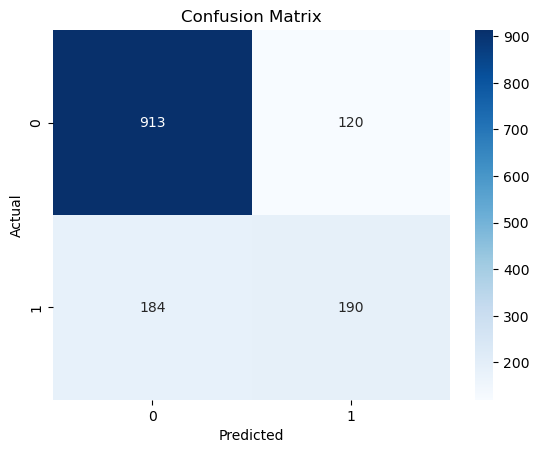

In [9]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy:  {accuracy:.4f}")

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

### Interpret Model Coefficients and Analyze Feature Importance

In [10]:
coefficients = pd.DataFrame({"Feature": X.columns, "Coefficient": log_reg.coef_[0]})
print(coefficients)

             Feature  Coefficient
0             gender    -0.099125
1      SeniorCitizen     0.303892
2            Partner     0.003624
3         Dependents    -0.252607
4             tenure    -0.070176
5       PhoneService    -0.396682
6      MultipleLines     0.077441
7    InternetService     0.065458
8     OnlineSecurity    -0.336566
9       OnlineBackup    -0.088747
10  DeviceProtection    -0.031324
11       TechSupport    -0.328703
12       StreamingTV     0.082820
13   StreamingMovies     0.096455
14          Contract    -0.697008
15  PaperlessBilling     0.281382
16     PaymentMethod    -0.051621
17    MonthlyCharges     0.014911
18      TotalCharges     0.000407


### Use GridSearchCV to tune hyperparameters (expensive search)

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the parameter grid
param_grid = { 
'C': [0.001, 0.01, 0.1, 1, 10, 100], # Regularization strength
'solver': ['liblinear', 'lbfgs', 'newton-cg', 'saga']  # Solvers
}

# Initialize the model
log_reg = LogisticRegression()

# Grid Search with Cross Validation
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)


# Best Parameters
print("Best Parameters:", grid_search.best_params_)

/Users/anantrajeev/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/anantrajeev/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

/Users/anantrajeev/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/anantrajeev/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/anantrajeev/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/anantrajeev/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.p

Best Parameters: {'C': 0.1, 'solver': 'newton-cg'}


### Train the model with those best hyperparameters

In [12]:
best_params = grid_search.best_params_  # or random_search.best_params_

# Train final model
best_log_reg = LogisticRegression(**best_params)
best_log_reg.fit(X_train, y_train)

# Evaluate performance
y_pred_best = best_log_reg.predict(X_test)

from sklearn.metrics import accuracy_score
print(f"Optimized Model Accuracy: {accuracy_score(y_test, y_pred_best):.4f}")

Optimized Model Accuracy: 0.7868


In [13]:
# To interpret the predicted probabilities
probs = best_log_reg.predict_proba(X_train)  # Predict probability of class 0 and 1
print(probs)

[[0.75464412 0.24535588]
 [0.57503257 0.42496743]
 [0.72747559 0.27252441]
 ...
 [0.45472014 0.54527986]
 [0.99077803 0.00922197]
 [0.47308719 0.52691281]]


In [14]:
# To interpret the predicted probabilities
probs = best_log_reg.predict_proba(X_train)  # Predict probability of class 0 and 1
print(probs)

[[0.75464412 0.24535588]
 [0.57503257 0.42496743]
 [0.72747559 0.27252441]
 ...
 [0.45472014 0.54527986]
 [0.99077803 0.00922197]
 [0.47308719 0.52691281]]
